In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df=pd.read_csv("/content/drive/MyDrive/AirQualityUCI.csv")

In [57]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH '],
      dtype='object')

In [58]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1554,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [59]:
df.shape

(9357, 15)

In [60]:
df[df == -200] = np.nan

In [61]:
df.isnull()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [62]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [64]:
#fill null values
columns_to_fill = df.columns[2:16]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [66]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.773395  0.289975  0.812361       0.795589   
PT08.S1(CO)    0.773395     1.000000  0.278286  0.883795       0.892970   
NMHC(GT)       0.289975     0.278286  1.000000  0.281928       0.279734   
C6H6(GT)       0.812361     0.883795  0.281928  1.000000       0.981953   
PT08.S2(NMHC)  0.795589     0.892970  0.279734  0.981953       1.000000   
NOx(GT)        0.762294     0.615961  0.098182  0.616832       0.601839   
PT08.S3(NOx)  -0.613880    -0.771935 -0.262008 -0.735737      -0.796690   
NO2(GT)        0.646500     0.562960  0.156546  0.536088       0.561400   
PT08.S4(NO2)   0.558209     0.682862  0.232962  0.765714       0.777208   
PT08.S5(O3)    0.759021     0.899325  0.240588  0.865689       0.880592   
T              0.020264     0.048658  0.066775  0.198964       0.241326   
RH             0.043196     0.114592 -0.052784 -0.061677      -0.090372   
AH             0.043274  

<ipython-input-66-472ebb0302a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


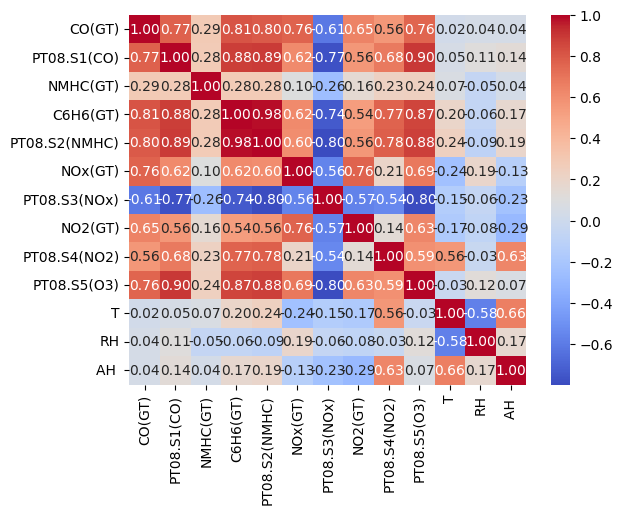

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.show()

In [67]:
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [46]:
# Assuming 'df' is your DataFrame and 'column_of_interest' is the column containing outliers
Q1 = df['RH'].quantile(0.25)
Q3 = df['RH'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['RH'] >= lower_bound) & (df['RH'] <= upper_bound)]

<Axes: >

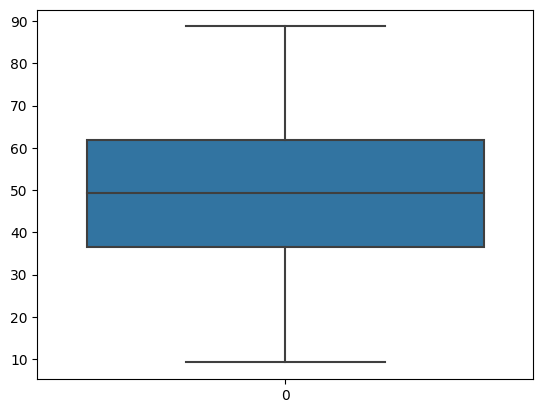

In [68]:
sns.boxplot(df['RH'])

In [69]:
df.shape

(9357, 13)

In [74]:
for i in range(1,13):
    percentile25=df[df.columns[i]].quantile(0.25)
    percentile75=df[df.columns[i]].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr

    filtered_subset = df.loc[df[df.columns[i]] < lower_limit].copy()
    filtered_subset.loc[:, df.columns[i]] = lower_limit
    df.loc[filtered_subset.index] = filtered_subset

    filtered_subset = df.loc[df[df.columns[i]] > upper_limit].copy()
    filtered_subset.loc[:, df.columns[i]] = upper_limit
    df.loc[filtered_subset.index] = filtered_subset

KeyError: 'AH'

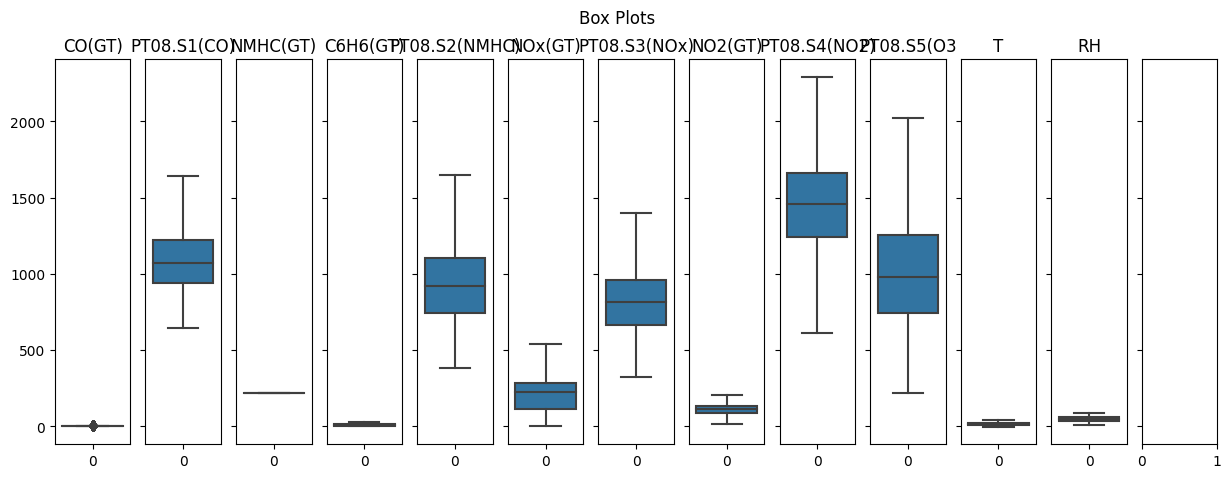

In [75]:
fig, axes = plt.subplots(1, 13, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots')

sns.boxplot(ax=axes[0],data=df['CO(GT)'])
axes[0].set_title("CO(GT)")

sns.boxplot(ax=axes[1],data=df['PT08.S1(CO)'])
axes[1].set_title("PT08.S1(CO)")

sns.boxplot(ax=axes[2],data=df['NMHC(GT)'])
axes[2].set_title("NMHC(GT)")

sns.boxplot(ax=axes[3],data=df['C6H6(GT)'])
axes[3].set_title("C6H6(GT)")

sns.boxplot(ax=axes[4],data=df['PT08.S2(NMHC)'])
axes[4].set_title("PT08.S2(NMHC)")

sns.boxplot(ax=axes[5],data=df['NOx(GT)'])
axes[5].set_title("NOx(GT)")

sns.boxplot(ax=axes[6],data=df['PT08.S3(NOx)'])
axes[6].set_title("PT08.S3(NOx)")

sns.boxplot(ax=axes[7],data=df['NO2(GT)'])
axes[7].set_title("NO2(GT)")

sns.boxplot(ax=axes[8],data=df['PT08.S4(NO2)'])
axes[8].set_title("PT08.S4(NO2)")
sns.boxplot(ax=axes[9],data=df['PT08.S5(O3)'])
axes[9].set_title("PT08.S5(O3")

sns.boxplot(ax=axes[10],data=df['T'])
axes[10].set_title("T")

sns.boxplot(ax=axes[11],data=df['RH'])
axes[11].set_title("RH")

sns.boxplot(ax=axes[12],data=df['AH'])
axes[12].set_title("AH")

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap
sns.heatmap(filtered_subset, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [50]:
from sklearn.model_selection import train_test_split
x = df_no_outliers.drop("RH", axis=1)  # Features
y = df_no_outliers["RH"]  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)


In [52]:
x_train_np = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Add a bias term
theta = np.linalg.inv(x_train_np.T @ x_train_np) @ x_train_np.T @ y_train.values

TypeError: can't multiply sequence by non-int of type 'float'